# Lab 10: Closed-Loop Network Analysis

#### Andrew Phillips

## Data Collection

In this lab, we used the Analog Discovery 2 to inject signals into our lab hardware to analyze the open and closed loop transfer functions of our circuit with compensator hardware added to our circuit. We then measured the step response of our circuit to an injected square wave. The data from our open loop, closed loop, and step response measurements are plotted below:

In [7]:
import csv
import pandas as pd

# read funky Rigol CSV format
def read_rigol_csv(csv_file_name):
    with open(csv_file_name) as f:
        rows = list(csv.reader(f))
        i = 0
        while rows[0][i] != "":
            i = i+1
        numcols = i-2
        t0 = float(rows[1][numcols])
        dT = float(rows[1][numcols+1])
    data = pd.read_csv(csv_file_name, usecols=range(0,numcols), skiprows=[1])
    data['X'] = t0+data['X']*dT
    return data, t0, dT

### Baseline Measurements

Text(0.5, 1.0, 'Baseline Shunt Voltage at 10V Output')

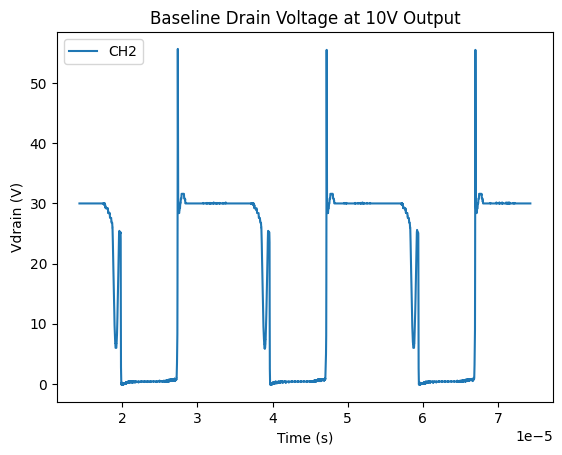

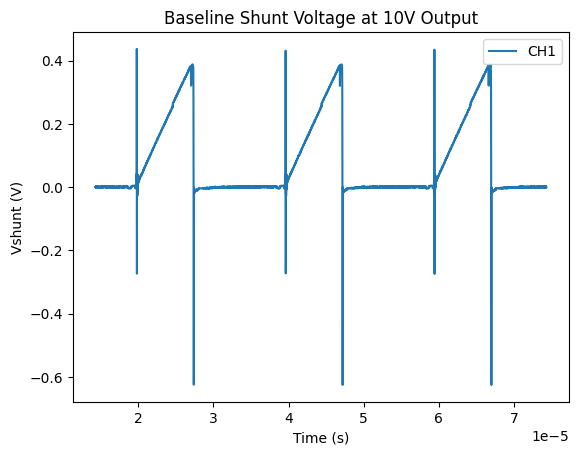

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# plot baseline measurements
[baseline_data, baseline_data_t0, baseline_data_dT] = read_rigol_csv('data/baseline.csv')

# apply data filter
baseline_data['CH1'] = baseline_data['CH1'].rolling(10).mean()
baseline_data['CH2'] = baseline_data['CH2'].rolling(10).mean()

# plot drain voltage
fig, ax = plt.subplots()
baseline_data.plot(x="X", y="CH2", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vdrain (V)")
ax.set_title("Baseline Drain Voltage at 10V Output")

# plot shunt voltage
fig, ax = plt.subplots()
baseline_data.plot(x="X", y="CH1", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vshunt (V)")
ax.set_title("Baseline Shunt Voltage at 10V Output")

## Post Lab Analysis

#### Open-Loop Transfer Function Measurements

Text(0.5, 0, 'Frequency (Hz)')

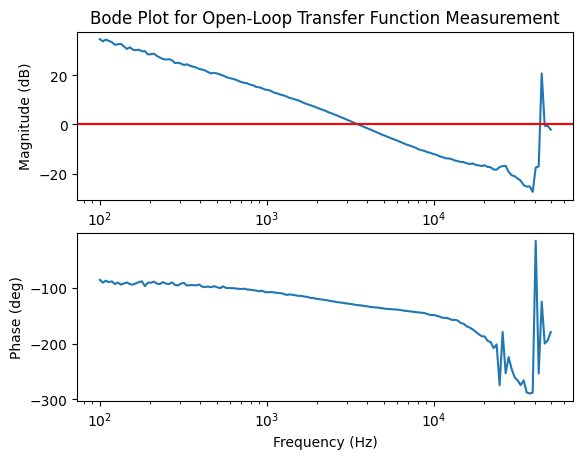

In [18]:
# import data
open_loop = pd.read_csv('data/open_loop.csv', header=19)

# plot bode plot
figure, ax = plt.subplots(2,1)

# plot magnitude
ax[0].plot(open_loop['Frequency (Hz)'],open_loop['Channel 2 Magnitude (dB)'])
ax[0].set_xscale('log')
ax[0].axhline(y=0,color='r')

# plot phase shift
ax[1].plot(open_loop['Frequency (Hz)'],open_loop['Channel 2 Phase (deg)'])
ax[1].set_xscale('log')

# set labels
ax[0].set_title("Bode Plot for Open-Loop Transfer Function Measurement")
ax[0].set_ylabel("Magnitude (dB)")
ax[1].set_ylabel("Phase (deg)")
ax[1].set_xlabel("Frequency (Hz)")

3. Given the bode plot plotted above, the open-loop transfer function has a cross-over frequency of 3.5kHz, a phase margin of 49 degrees and a gain margin of 16.6 dB. 

4. Looking at the low frequency magnitude and phase-shift, there appears to be a pole at 0, resulting in infinite gain at 0 Hz in the open loop transfer function. This corresponds with the behavior we want, as this will result in a closed-loop transfer function with unity gain at 0 Hz.

5. Based on this bode plot, we can predict that the closed-loop transfer function will be stable and have decent performance. The open-loop transfer function has a pole at 0, meaning the closed-loop transfer function will have unity gain at DC. The open-loop transfer function also has a phase margin of 49 degrees at the cross-over frequency, which is a good safety distance away from the open-loop transfer function = -1 (which will result in unstable behavior in the system).

#### Closed-Loop Transfer Function Measurements

Text(0.5, 0, 'Frequency (Hz)')

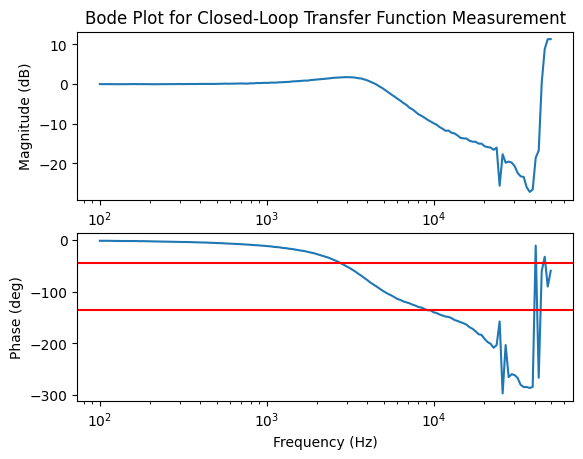

In [20]:
# import data
closed_loop = pd.read_csv('data/closed_loop.csv', header=19)
# plot bode plot
figure, ax = plt.subplots(2,1)

# plot magnitude
ax[0].plot(closed_loop['Frequency (Hz)'],closed_loop['Channel 2 Magnitude (dB)'])
ax[0].set_xscale('log')

# plot phase shift
ax[1].plot(closed_loop['Frequency (Hz)'],closed_loop['Channel 2 Phase (deg)'])
ax[1].set_xscale('log')
ax[1].axhline(y=-45,color='r')
ax[1].axhline(y=-135,color='r')

# set labels
ax[0].set_title("Bode Plot for Closed-Loop Transfer Function Measurement")
ax[0].set_ylabel("Magnitude (dB)")
ax[1].set_ylabel("Phase (deg)")
ax[1].set_xlabel("Frequency (Hz)")

7. Overall, the Bode plot for the closed-loop transfer function reasonably resembles a second order underdamped system. The system appears to have 2 poles, as there are 2 phase shifts (poles) visible in the bode plot, one at ~2.75 kHz (where the phase shift reaches -45 degrees) and one at ~9.1 kHz (where the phase shift reaches -135 degrees). The slight increase in magnitude at the corner frequency of the Bode plot indicates that the system is underdamped.

8. The closed-loop transfer function has a cut-off frequency and bandwidth of ~5.8 kHz (where the gain of the Bode plot reaches -3 dB).

9. The bode plot suggests that the closed-loop is underdamped, as there is an overshoot at the bode plot's corner frequency, indicating that there is oscillation (ringing) present in the circuit. I used the following equation from the link below to estimate the damping ratio of the system, where K is the DC gain of the system and M is the magnitude of the bode plot when the phase shift is -90 degrees:

![damping_eq](images/damping_eq.png)

From this equation, I calculated a damping ratio of 0.507.

https://ctms.engin.umich.edu/CTMS/index.php?aux=Extras_Identification#4 

10. Based on the nearly linear relationship between the damping ratio and phase margin of the open-loop transfer function, I would say this damping ratio fits the measured phase margin (damping ratio of 0.507 compared to a phase margin of 49 degrees).

#### Step-Response Measurements

Text(0.5, 0, 'Time (s)')

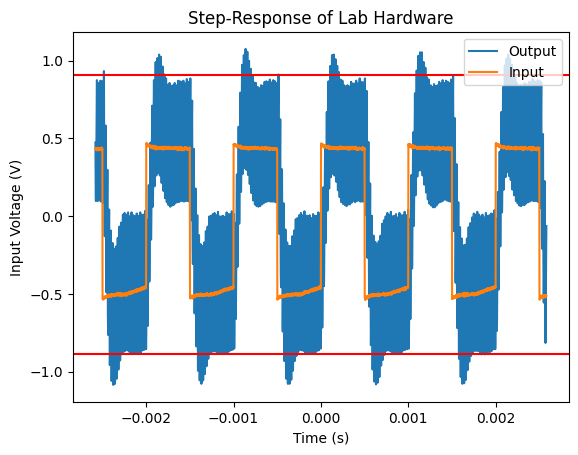

In [32]:
# import data
step_res = pd.read_csv('data/step_response.csv', header=18)
# add channel 2 offset
step_res['Channel 2 (V)'] += 9.7

# save offset data in new CSV
# step_res.to_csv('data/step_response_offset.csv')

# plot data
figure, ax = plt.subplots()
#ax2 = ax.twinx()
ax.plot(step_res['Time (s)'],step_res['Channel 2 (V)'])
ax.plot(step_res['Time (s)'],step_res['Channel 1 (V)'])
ax.axhline(y=0.91,color='r')
ax.axhline(y=-0.89,color='r')

# set labels
ax.set_title("Step-Response of Lab Hardware")
ax.legend(["Output","Input"])
ax.set_ylabel("Voltage (V)")
#ax2.set_ylabel("Output Voltage (V)",color='tab:red')
ax.set_xlabel("Time (s)")

12. The injected square wave has a high voltage of 0.44V and a low voltage of -0.5V. Based on the maximum and minimum output values(after the overshoot centers around the inputted square wave) of 0.91V and -0.89V respectively, I can calculate an average step response overshoot of 0.43V and a maximum percent overshoot of 91.48%.

13. I used the following equation from the same link above to calculate the damping ratio of the system, where Mp is the maximum percent overshoot of the step response.

![damp_eq_2](images/damp_eq_2.png)

Based on this equation, I calculated a damping ratio of 0.028, which is a much lower damping ratio than calculated from the closed-loop transfer function.


#### Final Observations

14. Overall, the measurements tell a similar story about the performance of the closed-loop control. The open-loop and closed-loop transfer functions especially show similar behavior, with the open-loop transfer function showing infinite gain at DC and a decent phase margin of 49 degrees, which corresponds with the closed-loop transfer function having unity gain at 0 and a damping ratio of 0.507, which closely matches my measured phase margin in the open-loop transfer function. These two transfer functions indicate that the closed-loop transfer function is exhibiting the behavior we expect, thanks to effective loop shaping of the open-loop transfer function. The damping ratio of the step response, however, is much lower than the transfer functions would lead me to believe. Comparing the input and output waveforms of the step response, it visually appears as if there is very little damping in the output due to the constant ringing, which matches my very low calculated damping ratio of 0.028. This discrepancy may be due the AD2 flywires being connected incorrectly, although we should not have changed these connections from the closed-loop transfer function data, which looks as expected.

15. The closed-loop control could be improved by increasing the damping ratio of the circuit to the ideal ratio of 0.6, which results in a better safety margin with a phase margin of 60 degrees in the open-loop transfer function. In addition, I would want to further investigate why the damping ratio of the step response is so poor in our circuit, especially because the open-loop and closed-loop transfer functions exhibit the behavior I expect (although this could also be due to faulty data gathering in the step response data).